### The factors that determine whether a video goes viral are hard to narrow down, especially since popularity can be so subjective. What if we could use objective factors such as video metadata and thumbnails to predict how many views a video will get? This is the goal of the Video Popularity Prediction Challenge hosted on the data science competition platform Bitgrit.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load training dataset
desc_train=pd.read_csv('train_desc_df.csv')
image_train=pd.read_csv('train_image_df.csv')
meta_train=pd.read_csv('train_meta_df.csv')
title_train=pd.read_csv('train_title_df.csv')

In [3]:
#load public dataset (dataset used for ranking)
desc_test=pd.read_csv('public_desc_df.csv')
image_test=pd.read_csv('public_image_df.csv')
meta_test=pd.read_csv('public_meta_df.csv')
title_test=pd.read_csv('public_title_df.csv')

In [4]:
#Dimension of training dataset
print('Dimension of train description data is', desc_train.shape)
print('Dimension of train image data is', image_train.shape)
print('Dimension of train meta data is', meta_train.shape)
print('Dimension of train title data is', title_train.shape)

Dimension of train description data is (3000, 51)
Dimension of train image data is (3000, 4001)
Dimension of train meta data is (3000, 14)
Dimension of train title data is (3000, 51)


In [5]:
#Dimension of test dataset
print('Dimension of test description data is', desc_test.shape)
print('Dimension of test image data is', meta_test.shape)
print('Dimension of test meta data is', meta_test.shape)
print('Dimension of test title data is', title_test.shape)

Dimension of test description data is (986, 51)
Dimension of test image data is (986, 13)
Dimension of test meta data is (986, 13)
Dimension of test title data is (986, 51)


# Exploratory Data Analysis

In [6]:
#Description Data
#Each column represents one coordinate in a 50-dimension space. While we cannot visualize this data, it’s important to know that vectors with similar values means that the original text was also similar.
desc_train.head()

,comp_id,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,2,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,-0.356706,0.213562,0.252663,0.090735,0.328961,-0.482705,0.067300,0.384217,-0.147253,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,-0.294013,0.165262,0.257102,0.421037,0.463214,-0.769155,0.159450,0.236385,-0.183974,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,-0.028657,0.157017,0.282709,-2.674227,-0.711383,2.259387,-0.162175,0.605468,0.712229,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085


In [7]:
#Image data
#image data is normalized within a range from -1 to 1
image_train.head()

,comp_id,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,1,0.484456,0.036087,-0.149328,0.144475,-0.617386,0.035018,0.169174,-0.005733,-0.104908,...,-0.090408,-0.032915,-0.010857,-0.015954,0.123416,0.195833,-0.066449,0.115818,-0.005140,0.017278
1,2,0.074533,-0.015655,-0.016286,-0.480964,0.687917,0.037131,-0.149725,-0.002098,0.099383,...,-0.625816,-0.009616,0.004558,0.008310,-0.173496,0.133518,-0.488898,0.084832,0.146566,0.007997
2,3,-0.396809,0.021490,-1.723037,0.666147,-0.631924,0.047724,0.336041,-0.003904,0.039683,...,-0.078059,0.086320,-0.005606,0.002414,-0.164493,0.218473,0.151292,-0.076860,0.008321,0.012555
3,4,0.995316,0.012766,0.387472,-0.684791,-0.209261,0.013654,0.138517,0.005586,0.079277,...,-0.190714,-0.005452,-0.003889,0.013430,0.344406,0.038220,0.210446,-0.145128,-0.019172,0.000532
4,5,-0.611648,0.000860,-0.572393,0.894287,-0.191228,-0.111583,-0.011111,0.003231,-0.160582,...,-0.040437,-0.142134,-0.022771,-0.013134,-0.024869,0.125129,0.215967,0.005288,0.145715,0.001425


In [8]:
#Meta Data
#views is the column we want to predict but views are not provided for our meta_test data
meta_train.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [9]:
meta_test.columns

Index(['comp_id', 'ad_blocked', 'embed', 'ratio', 'duration', 'language',
       'partner', 'partner_active', 'n_likes', 'n_tags', 'n_formats',
       'dayofweek', 'hour'],
      dtype='object')

In [10]:
#Title Data
#similar pattern
title_train.head()

,comp_id,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,1,-0.977637,-0.543310,0.079403,0.205560,-1.497104,0.230466,0.566112,-0.662264,0.130342,...,0.059434,-0.272340,-0.030180,-0.109040,-0.033425,0.728739,0.142030,0.397541,1.270722,-0.816523
1,2,0.041873,0.644655,0.140869,-0.664714,-0.062992,0.240086,-1.017593,1.019706,0.340133,...,0.242961,-0.404538,0.335224,-0.158068,-0.178225,0.351125,0.959121,0.673848,-0.530106,0.133466
2,3,-0.905595,0.097928,0.111981,-0.064753,-1.566516,0.140807,-0.946588,-0.342442,0.031226,...,0.414191,-0.457968,0.157185,-0.116985,0.404937,-0.220503,0.443171,0.643445,0.357957,0.525154
3,4,0.069220,0.411544,0.177700,-0.739998,-0.932620,-0.717982,-0.406487,-0.267096,0.114066,...,0.211731,-0.812590,0.258014,-0.180143,-0.564691,-0.515378,0.613686,0.817547,0.325042,0.254415
4,5,0.503560,-0.210970,-0.085412,0.549240,-0.019521,-0.255597,0.841144,0.250485,0.224235,...,-0.517912,0.543584,0.492052,-0.204867,-0.011538,-0.328607,-0.150055,-0.992373,-0.266003,-0.037134


In [11]:
#checking null values in metadata
meta_train.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [12]:
#some of our columns are categorical data, which means we have to convert them into dummy variables with one-hot encoding.
meta_train.dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views               int64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

### Plotting

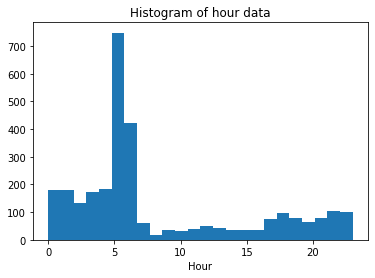

In [13]:
#Distribution of hour column, which represents when the video was uploaded to the hosting platform
#there’s a spike in our hours data at around 5am. Since the video platform has creators uploading in many time zones, this might not represent the time for their time zone, but it’s still useful information.
x=meta_train['hour']
plt.hist(x,bins=24)
plt.xlabel('Hour')
plt.title('Histogram of hour data')
plt.show()

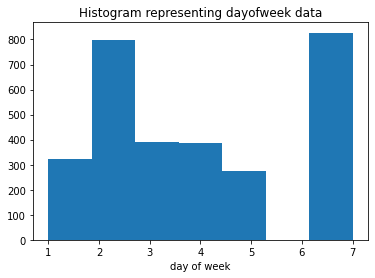

In [14]:
#Distribution of dayoftheweek column, which will tell which day of the week the video was uploaded.
#no data for Friday
#most video uploads are on Monday and Saturday.
x=meta_train['dayofweek']
plt.hist(x,bins=7)
plt.xlabel('day of week')
plt.title('Histogram representing dayofweek data')
plt.show()

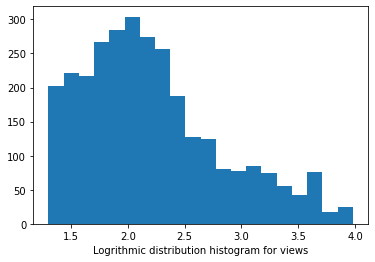

In [15]:
# the distribution is right-skewed, with the most frequent views being around 10² (or 100), and the least frequent views around 10⁴ (or 10,000).
x=np.log10(meta_train['views'])   #log distribution
plt.hist(x,bins=20)
plt.xlabel('Logrithmic distribution histogram for views')
plt.show()

c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


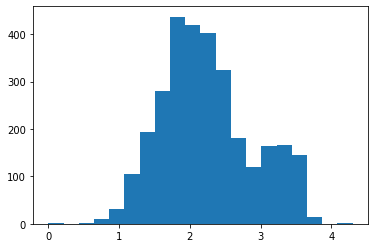

In [16]:
#duration column has some zero values, applying log transformation would produce -inf values. Therefore,replace them with zero values in order to plot a log version of plot.
# duration is mostly 10² seconds, which represents around a 2-minute long video.
duration_log=np.log10(meta_train['duration']).replace(-np.inf,0)
plt.hist(duration_log,bins=20)
plt.show()

### value counts

In [17]:
# Most of the videos are not ad blocked
meta_train['ad_blocked'].value_counts()

False    2980
True       20
Name: ad_blocked, dtype: int64

In [18]:
# most of the videos are embedded( Embedding refers to the integration of links, images, videos, gifs and other content into social media posts or other web media. Embedded content appears as part of a post and supplies a visual element that encourages increased click through and engagement.)
meta_train['embed'].value_counts()

True     2982
False      18
Name: embed, dtype: int64

### Cross_tabulation

In [19]:
# The crosstab() function is used to compute a simple cross tabulation of two (or more) factors


In [20]:
# The crosstab() function is used to compute a simple cross tabulation of two (or more) factors
# By performing cross-tabulation on the active and inactive partners, we can see that some of the videos have inactive partners.
pd.crosstab(meta_train.partner,meta_train.partner_active)

partner_active,False,True
partner,,
False,1194,0
True,1123,683


In [21]:
# correlations between numerical variable
# n_likes, language, and ratio have high correlation with our views variable.
corr_df=meta_train[['views', 'ratio', 'duration', 'language', 'n_likes', 'n_tags','n_formats', 'dayofweek', 'hour']]
sort_corr=corr_df.corr().sort_values('views',ascending=False).index
corr_df.corr()[sort_corr].iloc[0]

views        1.000000
n_likes      0.288940
language     0.105701
ratio        0.102332
n_tags       0.081795
duration     0.073680
n_formats    0.034488
hour        -0.014262
dayofweek   -0.022092
Name: views, dtype: float64

# Data Preprocessing

In [22]:
#Applying one_hot encoding
#pandas has a nifty function called get_dummies() which convert categorical variables into dummy variables
embed=pd.get_dummies(meta_train.embed,prefix='embed')
language=pd.get_dummies(meta_train['language'],prefix='language')
partner=pd.get_dummies(meta_train.partner,prefix='partner')
partner_active=pd.get_dummies(meta_train.partner_active,prefix='partner_a')
weekday=pd.get_dummies(meta_train.dayofweek,prefix='day')
# weekday[‘day_6’] was set to 0 because the data was missing day 6 (Friday)
weekday['day_6']=0

In [23]:
# cyclical feature encoding
# transform feature such as time,weeks,months or season, and still preserve their cyclical significance
sine_hour=np.sin(2*np.pi*meta_train['hour']/24.0)
sine_hour.name='sine_hour'
cos_hour=np.cos(2*np.pi*meta_train['hour']/24.0)
cos_hour.name='cos_hour'

In [24]:
# join all dataframe
meta_train_df=pd.concat([meta_train[['comp_id', 'views', 'ratio', 'language', 'n_likes', 'duration']].reset_index(drop=True),embed, partner, partner_active, language, weekday, sine_hour, cos_hour],axis=1)
meta_train_df.head()

,comp_id,views,ratio,language,n_likes,duration,embed_False,embed_True,partner_False,partner_True,...,language_10,day_1,day_2,day_3,day_4,day_5,day_7,day_6,sine_hour,cos_hour
0,1,290,1.77778,3,0,86,0,1,0,1,...,0,0,0,0,0,1,0,0,1.0,6.123234e-17
1,2,1443,1.33333,2,0,1129,0,1,0,1,...,0,0,0,0,0,1,0,0,1.0,6.123234e-17
2,3,329,1.76667,2,0,1163,0,1,0,1,...,0,0,0,0,0,1,0,0,1.0,6.123234e-17
3,4,63,1.77778,2,0,1326,0,1,0,1,...,0,0,0,0,0,1,0,0,1.0,6.123234e-17
4,5,37,1.77273,2,3,2612,0,1,0,1,...,0,0,0,0,0,1,0,0,1.0,6.123234e-17


In [25]:
meta_train_df.shape

(3000, 31)

## Lasso Regression

In [26]:
#set independent(x) and dependent(y) variable from image data 
y=meta_train['views']
x = image_train.loc[:, image_train.columns != 'comp_id']
# x=image_train.loc[:,1:]

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import collections

sel_model = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear')).fit(x,y)

In [28]:
# get index of good features
sel_index = sel_model.get_support()

# count the no of columns selected
counter = collections.Counter(sel_model.get_support())
counter

Counter({True: 1258, False: 2742})

In [29]:
image_index_df = pd.DataFrame(x[x.columns[(sel_index)]])
image_final_df = pd.concat([image_train[['comp_id']], image_index_df], axis=1)
image_final_df.head()

,comp_id,image_1,image_3,image_4,image_11,image_15,image_17,image_20,image_24,image_26,...,image_3959,image_3960,image_3962,image_3966,image_3968,image_3973,image_3974,image_3977,image_3984,image_3990
0,1,0.484456,-0.149328,0.144475,0.780332,-1.193367,0.359643,0.201758,0.392215,0.049990,...,-0.506946,-0.162883,-1.364837,-0.781976,-3.690247,1.522198,-0.606094,0.658431,-0.604360,0.111028
1,2,0.074533,-0.016286,-0.480964,0.410953,0.797866,-0.103046,-0.820352,-0.237525,-0.127445,...,1.284343,0.019412,0.406546,-0.552040,0.225877,1.708743,-0.204869,-0.510086,0.410483,-0.102448
2,3,-0.396809,-1.723037,0.666147,-0.006978,-1.849174,-0.451063,-0.669081,0.824120,0.288842,...,-0.249109,-0.389832,1.867043,1.650881,2.086596,-1.253300,-0.229919,-0.377193,0.605521,-0.384109
3,4,0.995316,0.387472,-0.684791,-0.356708,0.807046,0.111972,0.294054,5.531464,0.550411,...,1.032519,-0.087203,-1.364425,-0.414214,-2.780271,-0.199446,-0.387944,1.334685,0.869679,0.302376
4,5,-0.611648,-0.572393,0.894287,-0.260793,-0.219198,1.063709,0.717563,1.603678,-0.398335,...,-0.082778,-0.765341,0.282487,-0.020776,2.269820,0.469091,1.325833,-0.016011,0.467325,-0.171552


In [30]:
#Merge everything into one dataframe
final_df=pd.merge(pd.merge(meta_train_df,image_final_df,on='comp_id'),pd.merge(desc_train,title_train,on='comp_id'),on='comp_id')
final_df.shape

(3000, 1389)

## Preprocessing on Public/Test Data

In [31]:
# Test set
p_embed = pd.get_dummies(meta_test.embed, prefix ='embed')
p_partner = pd.get_dummies(meta_test.partner, prefix ='partner')
p_partner_active = pd.get_dummies(meta_test.partner_active, prefix ='partner_a')
p_language = pd.get_dummies(meta_test['language'], prefix='language')
p_language['language_6'] = 0
p_weekday = pd.get_dummies(meta_test['dayofweek'], prefix='day')
p_weekday['day_3'] = 0
p_weekday['day_4'] = 0
p_weekday['day_5'] = 0

In [32]:
## Cyclical encoding 
p_sin_hour = np.sin(2*np.pi*meta_test['hour']/24.0)
p_sin_hour.name = 'sin_hour'
p_cos_hour = np.cos(2*np.pi*meta_test['hour']/24.0)
p_cos_hour.name = 'cos_hour'

In [33]:
# Join all dataframes.
p_meta_final_df = pd.concat([meta_test[['comp_id', 'ratio', 'language', 'n_likes', 'duration']].reset_index(drop=True),
                             p_embed, p_partner, p_partner_active, p_language, p_weekday, p_sin_hour, p_cos_hour], axis=1)
p_meta_final_df.head()

# subset our test image dataframe with index used on training set
p_image_final_df = pd.concat([image_test[['comp_id']], image_index_df], axis=1)

# Merge all test set tables.
p_final_df = pd.merge(pd.merge(p_meta_final_df, p_image_final_df, on = 'comp_id'), 
                    pd.merge(desc_test, title_test, on = 'comp_id'), on = 'comp_id')
p_final_df.shape

(986, 1388)

# Building the XGBoost Model

## Train_test_split

In [34]:
# Convert dataframe to numpy array.
from sklearn.model_selection import train_test_split
X = final_df.drop(['comp_id', 'views'], axis=1).to_numpy()
y = final_df.loc[:, 'views'].to_numpy()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
print('Training set shape ', X_train.shape)
print('Test set shape ', X_test.shape)

Training set shape  (2250, 1387)
Test set shape  (750, 1387)


## Data Matrix

In [35]:
import xgboost as xgb
trlabel = y_train
telabel = y_test

dtrain = xgb.DMatrix(X_train, label=trlabel)
dtest  = xgb.DMatrix(X_test, label=telabel)

## Setting Parameters

In [36]:
# Set parameters.
param = {'max_depth': 7, 
         'eta': 0.2,
         'objective': 'reg:squarederror',
         'nthread': 5,
         'eval_metric': 'rmse'
        }

evallist = [(dtest, 'eval'), (dtrain, 'train')]

## Train the Model 

In [37]:
# Train the model.
num_round = 70
bst = xgb.train(param, dtrain, num_round, evallist)

c:\users\sohaib mallick\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	eval-rmse:1279.22931	train-rmse:1179.15720
[1]	eval-rmse:1218.13083	train-rmse:1059.67359
[2]	eval-rmse:1172.40929	train-rmse:978.23351
[3]	eval-rmse:1140.65271	train-rmse:903.75660
[4]	eval-rmse:1124.44459	train-rmse:839.02807
[5]	eval-rmse:1114.60184	train-rmse:790.45812
[6]	eval-rmse:1110.07399	train-rmse:732.67136
[7]	eval-rmse:1108.60729	train-rmse:708.46324
[8]	eval-rmse:1106.16350	train-rmse:665.92928
[9]	eval-rmse:1106.55443	train-rmse:623.15604
[10]	eval-rmse:1108.17412	train-rmse:597.59315
[11]	eval-rmse:1113.57521	train-rmse:551.72190
[12]	eval-rmse:1112.89227	train-rmse:523.34671
[13]	eval-rmse:1114.02325	train-rmse:496.56929
[14]	eval-rmse:1113.88507	train-rmse:474.41381
[15]	eval-rmse:1116.72149	train-rmse:452.05153
[16]	eval-rmse:1117.76555	train-rmse:433.11961
[17]	eval-rmse:1121.39848	train-rmse:409.37055
[18]	eval-rmse:1125.53210	train-rmse:384.55627
[19]	eval-rmse:1126.20682	train-rmse:370.51728
[20]	eval-rmse:1128.61825	train-rmse:360.73712
[21]	eval-rmse:1129.7

In [38]:
# Make prediction.
import math
from sklearn.metrics import mean_squared_error

ypred = bst.predict(dtest).round()

# Compute RMSE on test set.
mse_xgboost = mean_squared_error(y_test, ypred)
rmse_xgboost = math.sqrt(mse_xgboost)

print('RMSE with XGBoost', rmse_xgboost)

RMSE with XGBoost 1129.371014916415


## Fit model to public data (test data)

In [42]:
d_public = xgb.DMatrix(p_final_df.loc[:, p_final_df.columns != 'comp_id'])
solution = bst.predict(d_public).round()
solution_df = pd.concat([p_final_df[['comp_id']], pd.DataFrame(solution, columns = ['views'])], axis=1)
solution_df.to_csv('solution.csv', index=False)

In [43]:
solution_df

,comp_id,views
0,3001,246.0
1,3002,1441.0
2,3003,248.0
3,3004,1233.0
4,3005,105.0
...,...,...
981,3982,203.0
982,3983,149.0
983,3984,532.0
984,3985,193.0
